In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import zipfile
import os

In [2]:
df=pd.read_csv("station_hour.csv.zip")
df1=pd.read_csv("station_day.csv.zip")
df2=pd.read_csv("city_hour.csv.zip")
df3=pd.read_csv("city_day.csv.zip")
df4=pd.read_csv("stations.csv")



C:\Users\hp\AppData\Local\Temp\ipykernel_44228\3291985233.py:1: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("station_hour.csv.zip")


In [3]:
df['Datetime'] = pd.to_datetime(df['Datetime'])
df1['Date'] = pd.to_datetime(df1['Date'])
df2['Datetime'] = pd.to_datetime(df2['Datetime'])
df3['Date'] = pd.to_datetime(df3['Date'])



In [4]:
selected_stations = ['KL007', 'KL008']
df_filtered = df1[df1['StationId'].isin(selected_stations)]


In [5]:
aqi_trend = df_filtered.groupby(['Date', 'StationId'])['AQI'].mean().reset_index()


In [6]:
heatmap_data = aqi_trend.pivot(index='StationId', columns='Date', values='AQI')



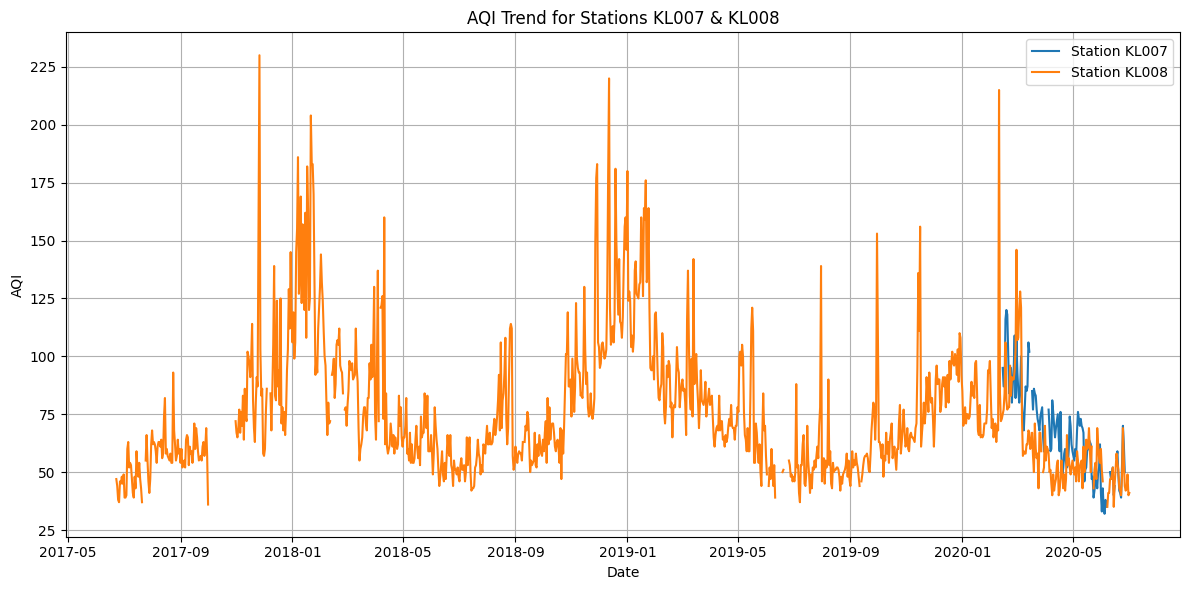

In [7]:
plt.figure(figsize=(12, 6))
for station in selected_stations:
    station_data = aqi_trend[aqi_trend['StationId'] == station]
    plt.plot(station_data['Date'], station_data['AQI'], label=f"Station {station}")
plt.xlabel("Date")
plt.ylabel("AQI")
plt.title("AQI Trend for Stations KL007 & KL008")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [8]:
df1= pd.read_csv("station_day.csv.zip")


In [9]:
df1['Date'] = pd.to_datetime(df1['Date'])


In [10]:
df_day_clean = df1.dropna(subset=['AQI'])


In [11]:
top_stations = df_day_clean['StationId'].value_counts().head(5).index.tolist()
print("Top Stations with most AQI data:", top_stations)


Top Stations with most AQI data: ['UP014', 'UP012', 'DL031', 'TN001', 'KA009']


In [12]:
df_filtered = df_day_clean[df_day_clean['StationId'].isin(top_stations)]



In [13]:
aqi_matrix = df_filtered.pivot_table(index='StationId', columns='Date', values='AQI', aggfunc='mean')



In [14]:
aqi_matrix = aqi_matrix.iloc[:, :60]

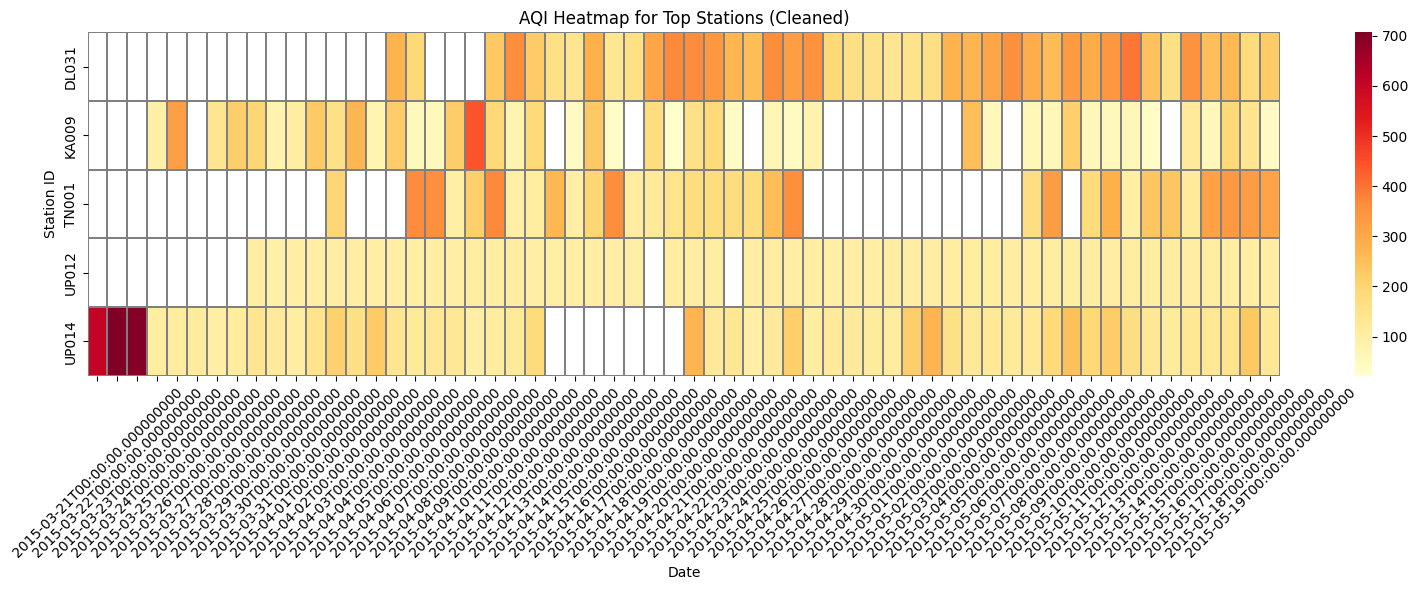

In [15]:
plt.figure(figsize=(16, 6))
sns.heatmap(aqi_matrix, cmap='YlOrRd', linewidths=0.3, linecolor='gray')
plt.title("AQI Heatmap for Top Stations (Cleaned)")
plt.xlabel("Date")
plt.ylabel("Station ID")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

